<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/TDClassificationPimaModifi%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I- Connection à votre drive pour lecture des données:

Cette étape est nécessaire seulement si vous travailler sous Clobal. Si vous travailler avec un aure éditeur python sur votre machine, il suffit de placer le fichier "pima.csv" dans votre répertoire de travail.

1- Créer sur votre drive google un répertoire au nom "data" et importer dedans le fichier pima.csv

2- Créer une connection à votre drive en exécutant le code suivant:

```
from google.colab import drive
drive.mount(‘/content/drive’)
```
4- Suivre les étapes de connection et copier le lien envoyé.
Si vous avez de difficultés, vous pouvez visualiser cette vidéo: https://youtu.be/TDyfhlg23vs



In [5]:
#céer une connection avec google colab
#from google.colab import drive
#drive.mount('/content/drive')



# II- Importation des données dans un frame pandas : 
Compléter le code suivant afin d’importer les données du fichier pima.csv et afficher les caractéristiques correspondantes.
1- Importer la librairie pandas

2- lire le fichier pima.csv (copier le chemin complet à partir de votre drive)

3- Afficher les dimensions de la table avec la propriété shape

4-afficher les colonnes et leurs types

In [6]:
#importer  la librairie Pandas
import pandas as pd
import requests
import io

#lecture du fichier "prima.txt" avec la fonction read_csv de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
#pima = pd.read_csv("/content/drive/MyDrive/Data/pima.csv", sep=',')

#############################################
# LECTURE DU FICHIER DEPUIS MON DEPOT GITHUB
#############################################
url = "https://raw.githubusercontent.com/fereol023/My-ML-Courses-/main/pima.csv"
download = requests.get(url).content
pima = pd.read_csv(io.StringIO(download.decode()), sep = ",")

#afficher les dimensions de la table des données avec la fonction pima.shape
print(pima.shape ) 
#afficher la liste des colonnes pima.columns
print(pima.columns)
#afficher la liste des colonnes et leurs types avec la fonction dtypes
print(pima.dtypes)

(767, 9)
Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')
6          int64
148        int64
72         int64
35         int64
0          int64
33.6     float64
0.627    float64
50         int64
1          int64
dtype: object


#III- Préparation des données d'apprentissage

## 1- Séparation des input / Output
1. Transférer la table pandas dans une matrice Numpy. Utiliser la fonction as_matrix().

2. Séparer des données explicatives X (8 premières variables) et de la cible Y (dernière variable). Utiliser le slicing.

In [7]:
#transformation en matrice numpy seul reconnu par scikit learn
data = pima.to_numpy()
#séparation des données explicatives X et de la cible Y
#X matrice des var. explicatives [:,0:8]
X = data[:,0:7]
#Y vecteur de la variable à prédire
y = data[:,8]

## 2- Scaling des données

Les variables dans l'échantillon Pima ont des échelles différentes. Pour que les techniques de classification s'appliquent correctement, il est conseillé  soit de normaliser (StandardScaler) soit de mettre à l'échelle 0-1 (Min-Max) toutes les variables. Dans ce cas, on vous suggère de tester les deux cas comme suit:
1. Séparer les données input X de l'output Y (Y ne 
doit pas être modifiée).
2. Appliquer la méthode StandardScalar() comme suit:
```
x_normalized=preprocessing.StandardScaler().fit_transform(x)
```
3. Appliquer la méthode MinMaxdScalar() comme suit:
```
x_scaled=preprocessing.MinMasScaler().fit_transform(x)
```

In [8]:
line = "====="*5

#importer le module preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#appliquer la normalisation de x
x_normalized=StandardScaler().fit_transform(X)

#appliquer le scaling de X 
x_scaled=MinMaxScaler().fit_transform(X)

#Afficher les premières lignes de X_normalized et x_scaled et noter l'intervalle des valeurs
print(x_normalized[0:5,:])
print(line)
print(x_scaled[0:5,:])

# Afficher X
print(line)
print(X[0:5,:])

[[-0.84372629 -1.12208597 -0.16024856  0.53202348 -0.69355921 -0.68372895
  -0.36426474]
 [ 1.23423997  1.94447577 -0.26357823 -1.28688187 -0.69355921 -1.10230105
   0.60470064]
 [-0.84372629 -0.99692019 -0.16024856  0.15569823  0.12235685 -0.49346891
  -0.91968415]
 [-1.14057861  0.50506924 -1.50353429  0.90834872  0.76467376  1.40913155
   5.48273197]
 [ 0.343683   -0.15205113  0.25307013 -1.28688187 -0.69355921 -0.81056898
  -0.8170523 ]]
[[0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792]
 [0.29411765 0.58291457 0.60655738 0.         0.         0.38152012
  0.05251921]]
[[1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-0

## 3- Découpage des données

1. Découper  les données `x_nomalized` et `x_scaled` en données train et test avec la fonction **train_test_split** du module **model_selection** de pandas. La taille de l’échantillon test est égale à 300 (paramètre test_size de la fonction `train_test_split`).
Effectuer ce découpage afin de créer (x1_train, y1_train) à partir de  `x_nomalized` et (x2_train, y2_train) à partir de `x_scaled`.

2. Afficher les structures des ensembles crées en utilisant la propriété  `shape` de chaque vecteur.

In [9]:
import numpy as np
np.random.seed(5)

tsize = 300/(300+468)

#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas
#importation du module model_selection de scikit learn
from sklearn.model_selection import train_test_split
#subdivision des données éch.test = 300 ; éch.app = 468
x0_train,x0_test,y0_train,y0_test = train_test_split(X, y, test_size=tsize) #à partir de la matrice X sans preprocessing
x1_train,x1_test,y1_train,y1_test = train_test_split(x_normalized, y, test_size=tsize) #à partir de x_normalized
x2_train,x2_test,y2_train,y2_test = train_test_split(x_scaled, y, test_size=0.3)  # à partir de x_scaled
print(line)
print("DONNEES SIMPLES")
print(x0_train.shape, x0_test.shape, y0_train.shape, y0_test.shape)
print(x0_train[:10])
print(y0_train[:10])
print(line)
print("Avec STANDARD SCALER")
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)
print(x1_train[:10])
print(y1_train[:10])
print(line)
print("Avec MIN MAX SCALER")
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)
print(x2_train[:10])
print(y2_train[:10])

DONNEES SIMPLES
(467, 7) (300, 7) (467,) (300,)
[[1.000e+00 1.810e+02 7.800e+01 4.200e+01 2.930e+02 4.000e+01 1.258e+00]
 [5.000e+00 1.240e+02 7.400e+01 0.000e+00 0.000e+00 3.400e+01 2.200e-01]
 [1.000e+00 1.470e+02 9.400e+01 4.100e+01 0.000e+00 4.930e+01 3.580e-01]
 [3.000e+00 1.110e+02 6.200e+01 0.000e+00 0.000e+00 2.260e+01 1.420e-01]
 [5.000e+00 7.800e+01 4.800e+01 0.000e+00 0.000e+00 3.370e+01 6.540e-01]
 [6.000e+00 8.000e+01 6.600e+01 3.000e+01 0.000e+00 2.620e+01 3.130e-01]
 [1.000e+00 7.700e+01 5.600e+01 3.000e+01 5.600e+01 3.330e+01 1.251e+00]
 [0.000e+00 1.460e+02 8.200e+01 0.000e+00 0.000e+00 4.050e+01 1.781e+00]
 [8.000e+00 6.500e+01 7.200e+01 2.300e+01 0.000e+00 3.200e+01 6.000e-01]
 [1.000e+00 1.220e+02 6.400e+01 3.200e+01 1.560e+02 3.510e+01 6.920e-01]]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
Avec STANDARD SCALER
(467, 7) (300, 7) (467,) (300,)
[[-2.50021644e-01  3.56975430e-02  4.59729470e-01 -1.28688187e+00
  -6.93559212e-01 -1.14035306e+00 -6.57067363e-01]
 [-1.14057861e+00  

# IV - Classification avec le modèle de régression logistique
Comme première approche de classification, nous utiliserons la régression logistique.

1-A partir du module `linear_model` du package sklearn, importer la classe `LogisticRegression`.

2- Créer une instance de la classe `LogisticRegression`.

3- Exécuter l'instance sur les données d'apprentissage `x1_train` afin de construire votre premier modèle prédictif que vous appellerez « modèle_LR1 ».  Pour ce faire, il faut exécuter la fonction fit de la classe LogisticRegression qui prend comme argument les ensembles les données explicatives `x1_train` et les données cibles `y1_train`. Refaire la même chose avec `x2_train` et `y1_train` pour obtenir le modèle « modèle_LR2 »

4- Appliquer les modèles générés sur les données tests `x_test` à travers la fonction `predict'.

5- Importer le module seaborn `import seaborn as sns`

6- Afficher la matrice de confusion.




In [10]:
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression
#création d'une instance de la classe
LR= LogisticRegression()
#exécution de l'instance sur les données d'apprentissage x1_train et x2_train
#c.à d . construction du modèle prédictif
modele_LR0=LR.fit(x0_train, y0_train)
modele_LR1=LR.fit(x1_train, y1_train)
modele_LR2=LR.fit(x2_train, y2_train)
#application des modèles sur les données test
y0_pred=modele_LR0.predict(x0_test)
y1_pred=modele_LR1.predict(x1_test)
y2_pred=modele_LR2.predict(x2_test)
#Calculer les scores des modèles
#Importer le module metric
from sklearn import metrics
model_lr0_score=metrics.accuracy_score(y0_pred, y0_test)
model_lr1_score=metrics.accuracy_score(y1_pred, y1_test)
model_lr2_score=metrics.accuracy_score(y2_pred, y2_test)

#Affichier les ascores Que remarquez vous?
print("accuracy without preprocessing :", round(model_lr0_score*100,2), "%")
print("accuracy standard scaler :", round(model_lr1_score*100,2), "%")
print("accuracy min max scaler :", round(model_lr2_score*100,2), "%")

#
#importer le module seaborn (pour la matrice de confusion)
import seaborn as sns
#création de la matrice de confusion
matrix_LR0 = metrics.confusion_matrix(y0_test, y0_pred)
matrix_LR1 = metrics.confusion_matrix(y1_test, y1_pred)
matrix_LR2 = metrics.confusion_matrix(y2_test, y2_pred)

print(line)
print("MATRICE DE CONFUSION SANS PREPROCESSING")
print(matrix_LR0)
print(line)
print("MATRICE DE CONFUSION STANDARD SCALER")
print(matrix_LR1)
print(line)
print("MATRICE DE CONFUSION MIN MAX SCALER")
print(matrix_LR2)


accuracy without preprocessing : 36.0 %
accuracy standard scaler : 79.33 %
accuracy min max scaler : 78.35 %
MATRICE DE CONFUSION SANS PREPROCESSING
[[  0 192]
 [  0 108]]
MATRICE DE CONFUSION STANDARD SCALER
[[184   9]
 [ 53  54]]
MATRICE DE CONFUSION MIN MAX SCALER
[[144  16]
 [ 34  37]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Confusion matrix#
[[184   9]
 [ 53  54]]


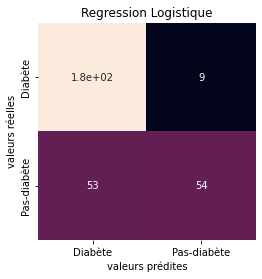

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot confusion matrix
print("#Confusion matrix#")
labels = ["Diabète", "Pas-diabète"]
#Regression logistique
print(matrix_LR1)
sns.heatmap(matrix_LR1, square=True, annot=True, cbar=False, xticklabels=list(labels), yticklabels=list(labels))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.title("Regression Logistique")

plt.show()

Pour la suite du TP, vous garderez que les données normalisées (x1_train et y1_train) qui seront renommées x_train et x_test

In [12]:
x_train=x1_train
y_train=y1_train
x_test=x1_test
y_test=y1_test

# V- Classificatin par arbre de décision
Comme deusième approche de classification, nous utiliserons l'arbre de décision.

1-A partir du module tree du package sklearn, importer la classe DecisionTreeClassifier.

2- Créer une instance de la classe `DecisionTreeClassifier`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre deuxième modèle prédictif que vous appellerez « modèle_DT ».  Pour ce faire, il faut exécuter la fonction fit de la classe DecisionTreeClassifier qui prend comme argument les ensembles les données explicatives `x_train` et les données cibles `y_train`.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

In [13]:
#importer la classe decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#création d'une instance de la classe
tree = DecisionTreeClassifier()
#exécution de l'instance sur les données d'apprentissage
#c.à d . construction du modèle prédictif
modele_tree0 = tree.fit(x0_train, y0_train)
modele_tree1 = tree.fit(x1_train, y1_train)
modele_tree2 = tree.fit(x2_train, y2_train)

#test du modèle sur les données test
y0_pred = modele_tree0.predict(x0_test)
y1_pred = modele_tree1.predict(x1_test)
y2_pred = modele_tree2.predict(x2_test)

#création de la matrice de confusion
matrix_tree0 = metrics.confusion_matrix(y0_test, y0_pred)
matrix_tree1 = metrics.confusion_matrix(y1_test, y1_pred)
matrix_tree2 = metrics.confusion_matrix(y2_test, y2_pred)

# calcul des accuracy
model_tree0_score=metrics.accuracy_score(y0_pred, y0_test)
model_tree1_score=metrics.accuracy_score(y1_pred, y1_test)
model_tree2_score=metrics.accuracy_score(y2_pred, y2_test)

#Affichier les ascores Que remarquez vous?
print("accuracy without preprocessing :", round(model_tree0_score*100,2), "%")
print("accuracy standard scaler :", round(model_tree1_score*100,2), "%")
print("accuracy min max scaler :", round(model_tree2_score*100,2), "%")

print(line)
print("MATRICE DE CONFUSION SANS PREPROCESSING")
print(matrix_tree0)
print(line)
print("MATRICE DE CONFUSION STANDARD SCALER")
print(matrix_tree1)
print(line)
print("MATRICE DE CONFUSION MIN MAX SCALER")
print(matrix_tree2)

accuracy without preprocessing : 37.67 %
accuracy standard scaler : 70.33 %
accuracy min max scaler : 70.56 %
MATRICE DE CONFUSION SANS PREPROCESSING
[[ 37 155]
 [ 32  76]]
MATRICE DE CONFUSION STANDARD SCALER
[[169  24]
 [ 65  42]]
MATRICE DE CONFUSION MIN MAX SCALER
[[126  34]
 [ 34  37]]


# VI- Classification par la forêt d'arbres
Comme troisième approche de classification, nous utiliserons un forêt d'arbre de décision.

1-A partir du module `ensemble` du package sklearn, importer la classe `RandomForestClassifier`.

2- Créer une instance de la classe `RandomForestClassifier`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre Troisième modèle prédictif que vous appellerez « modèle_RF ».  Pour ce faire, il faut exécuter la fonction fit de la classe RandomForestClassifier qui prend comme argument les ensembles les données explicatives `x_train` et les données cibles `y_train`.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

In [14]:
#importer la classe RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#création d'une instance de la classe
rfc = RandomForestClassifier()
#exécution de l'instance sur les données d'apprentissage
#c.à d . construction du modèle prédictif
modele_rfc0 = rfc.fit(x0_train, y0_train)
modele_rfc1 = rfc.fit(x1_train, y1_train)
modele_rfc2 = rfc.fit(x2_train, y2_train)

#test du modèle sur les données test
y0_pred = modele_rfc0.predict(x0_test)
y1_pred = modele_rfc1.predict(x1_test)
y2_pred = modele_rfc2.predict(x2_test)

#création de la matrice de confusion
matrix_rfc0 = metrics.confusion_matrix(y0_test, y0_pred)
matrix_rfc1 = metrics.confusion_matrix(y1_test, y1_pred)
matrix_rfc2 = metrics.confusion_matrix(y2_test, y2_pred)

# calcul des accuracy
model_rfc0_score=metrics.accuracy_score(y0_pred, y0_test)
model_rfc1_score=metrics.accuracy_score(y1_pred, y1_test)
model_rfc2_score=metrics.accuracy_score(y2_pred, y2_test)

#Affichier les ascores Que remarquez vous?
print("accuracy without preprocessing :", round(model_rfc0_score*100,2), "%")
print("accuracy standard scaler :", round(model_rfc1_score*100,2), "%")
print("accuracy min max scaler :", round(model_rfc2_score*100,2), "%")

print(line)
print("MATRICE DE CONFUSION SANS PREPROCESSING")
print(matrix_rfc0)
print(line)
print("MATRICE DE CONFUSION STANDARD SCALER")
print(matrix_rfc1)
print(line)
print("MATRICE DE CONFUSION MIN MAX SCALER")
print(matrix_rfc2)

accuracy without preprocessing : 36.0 %
accuracy standard scaler : 73.0 %
accuracy min max scaler : 76.19 %
MATRICE DE CONFUSION SANS PREPROCESSING
[[  0 192]
 [  0 108]]
MATRICE DE CONFUSION STANDARD SCALER
[[176  17]
 [ 64  43]]
MATRICE DE CONFUSION MIN MAX SCALER
[[133  27]
 [ 28  43]]


# VII- Classification par les SVM
Comme quatrième approche de classification, nous utiliserons les SVM.

1-A partir du module `svm` du package sklearn, importer la classe `SVC`.

2- Créer une instance de la classe `SVC` de `sklearn.svm`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre quatrième modèle prédictif que vous appellerez « modèle_SVM ».  Pour ce faire, il faut exécuter la fonction fit de la classe SVC.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

In [15]:
#importer la classe SVC
from sklearn.svm import SVC
#création d'une instance de la classe
SVC = SVC()
#exécution de l'instance sur les données d'apprentissage
#c.à d . construction du modèle prédictif
#c.à d . construction du modèle prédictif
modele_svc0 = SVC.fit(x0_train, y0_train)
modele_svc1 = SVC.fit(x1_train, y1_train)
modele_svc2 = SVC.fit(x2_train, y2_train)

#test du modèle sur les données test
y0_pred = modele_svc0.predict(x0_test)
y1_pred = modele_svc1.predict(x1_test)
y2_pred = modele_svc2.predict(x2_test)

#création de la matrice de confusion
matrix_svc0 = metrics.confusion_matrix(y0_test, y0_pred)
matrix_svc1 = metrics.confusion_matrix(y1_test, y1_pred)
matrix_svc2 = metrics.confusion_matrix(y2_test, y2_pred)

# calcul des accuracy
model_svc0_score=metrics.accuracy_score(y0_pred, y0_test)
model_svc1_score=metrics.accuracy_score(y1_pred, y1_test)
model_svc2_score=metrics.accuracy_score(y2_pred, y2_test)

#Affichier les ascores Que remarquez vous?
print("accuracy without preprocessing :", round(model_svc0_score*100,2), "%")
print("accuracy standard scaler :", round(model_svc1_score*100,2), "%")
print("accuracy min max scaler :", round(model_svc2_score*100,2), "%")

print(line)
print("MATRICE DE CONFUSION SANS PREPROCESSING")
print(matrix_svc0)
print(line)
print("MATRICE DE CONFUSION STANDARD SCALER")
print(matrix_svc1)
print(line)
print("MATRICE DE CONFUSION MIN MAX SCALER")
print(matrix_svc2)

accuracy without preprocessing : 36.0 %
accuracy standard scaler : 35.67 %
accuracy min max scaler : 78.79 %
MATRICE DE CONFUSION SANS PREPROCESSING
[[  0 192]
 [  0 108]]
MATRICE DE CONFUSION STANDARD SCALER
[[  0 193]
 [  0 107]]
MATRICE DE CONFUSION MIN MAX SCALER
[[141  19]
 [ 30  41]]


# VIII- Validation des modèles

1. Calculer le score de chaque modèle généré et l'ajouter dans une liste

2. Afficher la courbe des scores "AccuracyScore"

Comparer les résultats

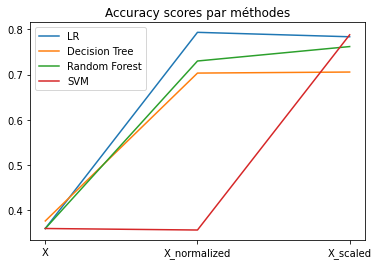

                      X  X_normalized  X_scaled
LR             0.360000      0.793333  0.783550
Decison Tree   0.376667      0.703333  0.705628
Random Forest  0.360000      0.730000  0.761905
SVM            0.360000      0.356667  0.787879


In [16]:
#Calculer les accuracy des modèles
#Ajouter tous les scores à une liste
scores_lr = [model_lr0_score, model_lr1_score, model_lr2_score]
scores_tree = [model_tree0_score, model_tree1_score, model_tree2_score]
scores_rfc = [model_rfc0_score, model_rfc1_score, model_rfc2_score]
scores_svm = [model_svc0_score, model_svc1_score, model_svc2_score]

#Importer Pyplot
import matplotlib.pyplot as plt
#Afficher la liste des scores dans une courbe
X_labels = ["X", "X_normalized", "X_scaled"]
plt.plot(X_labels, scores_lr, label="LR")
plt.plot(X_labels, scores_tree, label="Decision Tree")
plt.plot(X_labels, scores_rfc, label="Random Forest")
plt.plot(X_labels, scores_svm, label="SVM")
plt.title("Accuracy scores par méthodes")
plt.legend()
plt.show()

acc = np.array([scores_lr, scores_tree, scores_rfc, scores_svm])
accuracy_table = pd.DataFrame(acc, columns = X_labels, index=["LR", "Decison Tree", "Random Forest", "SVM"])
print(line)
print(accuracy_table)

IX - Validation croisée
Reprendre l'étape III-3 pour tester maintenant les modèles avec la validation croisée.
```
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
```
Les modèles d'apprentissage sont ensuite appliqués sur les échantillons des données (ex pour Logistic Regression) 
```
cv_results = cross_validate(
    LogisticRegression, x_train, x_test, cv=cv, scoring="accuracy_score")
```



VALIDATION CROISEE AVEC DONNEES STANDARDISEES SUR LE MODELE DE REGRESSION LOGISTIQUE 
   fit_time  score_time  test_score
0  0.008992    0.000853    0.744681
1  0.007354    0.000768    0.744681
2  0.003983    0.000444    0.758865
3  0.003605    0.000437    0.801418
4  0.003468    0.000427    0.765957
5  0.003433    0.000417    0.758865
6  0.003731    0.000445    0.765957
7  0.003457    0.000406    0.787234
8  0.003865    0.000419    0.787234
9  0.003668    0.000434    0.773050
VALIDATION CROISEE AVEC DONNEES SCALED SUR LE MODELE DE REGRESSION LOGISTIQUE 
   fit_time  score_time  test_score
0  0.004997    0.000452    0.732919
1  0.004778    0.000481    0.782609
2  0.004730    0.000447    0.757764
3  0.005670    0.000504    0.732919
4  0.005337    0.000515    0.801242
5  0.005820    0.000480    0.763975
6  0.005302    0.000427    0.739130
7  0.005764    0.000452    0.708075
8  0.005292    0.000436    0.726708
9  0.004895    0.000477    0.801242


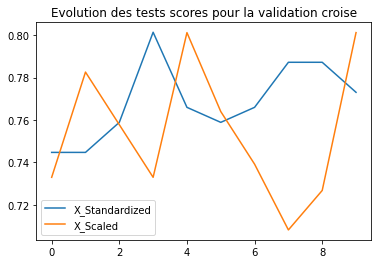

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
cv_results1 = cross_validate(modele_LR1, x1_train, y1_train, cv=cv, scoring="accuracy")
cv_results1 = pd.DataFrame(cv_results1)
print("VALIDATION CROISEE AVEC DONNEES STANDARDISEES SUR LE MODELE DE REGRESSION LOGISTIQUE ")
print(cv_results1)

cv_results2 = cross_validate(modele_LR2, x2_train, y2_train, cv=cv, scoring="accuracy")
cv_results2 = pd.DataFrame(cv_results2)
print(line)
print("VALIDATION CROISEE AVEC DONNEES SCALED SUR LE MODELE DE REGRESSION LOGISTIQUE ")
print(cv_results2)

print(line)
plt.plot(cv_results1["test_score"], label="X_Standardized")
plt.plot(cv_results2["test_score"], label="X_Scaled")
plt.title("Evolution des tests scores pour la validation croise")
plt.legend()
plt.show()